In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
! kaggle datasets download tondji/jobs-data-for-recommender-systems

Dataset URL: https://www.kaggle.com/datasets/tondji/jobs-data-for-recommender-systems
License(s): CC0-1.0
 31% 5.00M/16.0M [00:00<00:00, 27.9MB/s]
100% 16.0M/16.0M [00:00<00:00, 68.8MB/s]


In [3]:
import zipfile
zip_ref =  zipfile.ZipFile('/content/jobs-data-for-recommender-systems.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Introduction:


I have developed a sophisticated recommendation system tailored to match job seekers with relevant opportunities based on their skill sets. By allowing users to input their skills, the system quickly identifies and suggests job openings that align with their expertise. Leveraging machine learning technology, this solution provides personalized job recommendations, ensuring more accurate and relevant connections.

For businesses, this system significantly enhances the recruitment process by streamlining candidate sourcing. It reduces time spent on manual screening by automatically matching qualified talent to open roles, improving the overall efficiency of hiring. By presenting pre-qualified candidates whose skills align with job requirements, businesses can focus on high-quality candidates, leading to better hiring outcomes, faster placement, and reduced recruitment costs. This system not only improves talent acquisition but also ensures that companies attract the most suitable candidates, fostering long-term employee retention.

### Objective:
The objective for making the such system requires jobs offers and skills dataset that I have exploited from the kaggle. In order to build recommender system, skills datasets should be convorted to tags and then converted to vectors so that recommender system can understand. However, we wont use neural network algorithms but probabilistic ML algorithms such as cosine_similarity algorithm so that it find similarity by using angle distances.

### Recommender System:

A recommender system is a type of software or algorithm designed to suggest items, content, or products to users based on their preferences, behaviors, or characteristics. These systems analyze user data such as past purchases, browsing history, ratings, and interactions to make personalized recommendations.

There are three main types of recommender systems:
 - **Content-Based Filtering**: Recommends items that are similar to what the user has liked or engaged with in the past, based on item features.

 - **Collaborative Filtering**: Suggests items based on the preferences of other users with similar tastes or behaviors, either through:

- - **User-based**: Recommending items liked by similar users.
- - **Item-based**: Recommending items similar to what the user has previously liked.

- **Hybrid Systems**: Combine both content-based and collaborative filtering techniques to improve recommendation accuracy.

Recommender systems are widely used across industries such as e-commerce (product recommendations), streaming services (movies, music), and job boards (job recommendations).

### Import Libriaries:

In [4]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data preprocessing:

In [5]:
all_offers = pd.read_csv(r'/content/offers.csv')

In [6]:
# Shows 252 number of job offers along with skills and 8 features
print(all_offers.shape)

(252, 8)


In [7]:
all_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1..."
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '..."
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 4, 'designer': 1, 'pro..."


In [8]:
# In order to get tags we have to first convert skills from string to dictionary
import ast

def extract_skills(text):
  skills_dict = ast.literal_eval(text)

  if 'skills' in skills_dict:
    return list(skills_dict['skills'].keys())

In [9]:
all_offers['skills'] = all_offers['skills'].apply(lambda x: extract_skills(x))

In [10]:
all_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"[training, certifications, http, processing, i..."
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"[hardware, communication, ensemble]"
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"[communication, e-commerce]"
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"[mobile, communication, design]"
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"[training, designer, programming, implementati..."


In [11]:
# For Recommender system to learn tags efficiently we have to remove word spaces for each skills
def collapse(text):
  L = []
  for i in text:
    L.append(i.replace(" ", ""))
  return L

In [12]:
all_offers['skills'] = all_offers['skills'].apply(lambda x: collapse(x))

In [13]:
# Now lets convert list to a string
all_offers['skills'] = all_offers['skills'].apply(lambda x: ' '.join(x))

In [14]:
all_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,training certifications http processing implem...
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,hardware communication ensemble
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,communication e-commerce
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,mobile communication design
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,training designer programming implementation c...


In [15]:
# Taking only usefu features
jobs_df = all_offers[['user_id', 'organization_id', 'job_title', 'skills']].copy()
jobs_df.head()

,user_id,organization_id,job_title,skills
0,55,0,Medical Receptionist,training certifications http processing implem...
1,90,1,Clinical Research Associate,hardware communication ensemble
2,2,2,Territory Sales Representative,communication e-commerce
3,3,3,Bus Driver,mobile communication design
4,4,4,Foreign Service Officer,training designer programming implementation c...


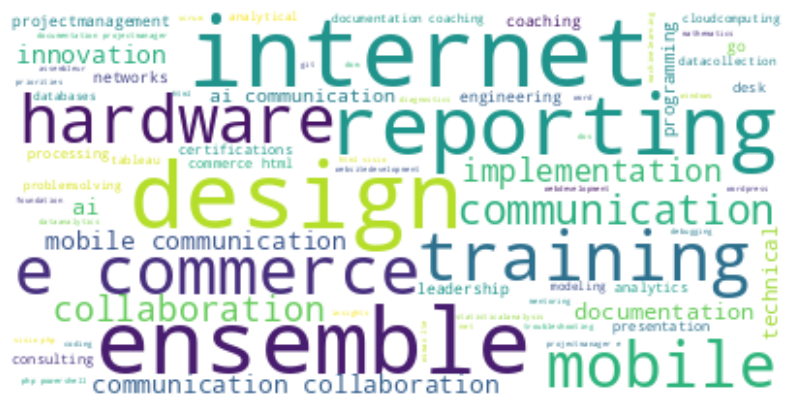

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in jobs_df['skills'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Most of the skills present here are technical skills such as hardware, training, design, engineerig and programming. Thus, it gives a quiet a general info that labor supply in labor market most of time consists of technical skills.

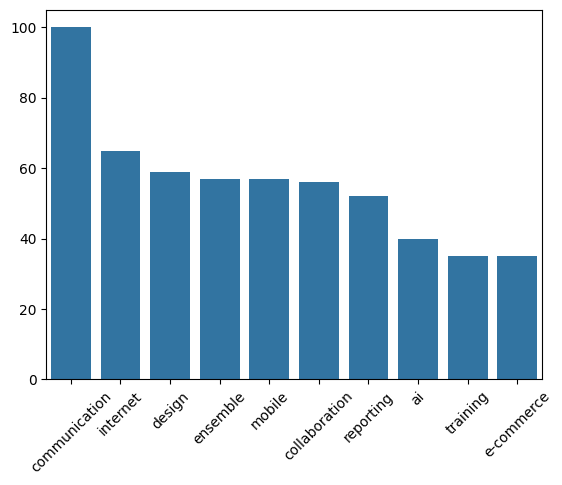

In [17]:
from collections import Counter
import seaborn as sns

word_counts = Counter(" ".join(jobs_df['skills']).split())
common_words = word_counts.most_common(10)

words, counts = zip(*common_words)
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.show()


This figure also tells that most of the skills are related to techinical and also most of the skills are combined with communication skill.

In [18]:
# Convert string to a vector matrix
cv = CountVectorizer(max_features = 300)

skills_matrix = cv.fit_transform(jobs_df['skills'])

In [19]:
# Recommender function takes skills and give related jobs offers
def recommend_jobs(skills, n_jobs = 5):

  # convert input skills to avector
  input_skills_vector = cv.transform([skills])

  # Find similarity between input vector to a vector matrix
  similarity = cosine_similarity(input_skills_vector, skills_matrix).flatten()

  # finding top related job offers (argsort just gives order numbering)
  top_indices = similarity.argsort()[-n_jobs : ][::-1]

  # Getting the similar job offers whose index are given as top_indices
  similar_jobs = jobs_df['job_title'].iloc[top_indices]

  return similar_jobs

In [20]:
# Testing the system
# Finding the related job offers that have maths skill
input_skills = 'mathematics'
jobs_recommended = recommend_jobs(input_skills, n_jobs = 5)

print(jobs_recommended)

48    Assistant Technician
49    Strategy Consultant?
7            Cost Engineer
90       Quality Assistant
89      Reservoir Engineer
Name: job_title, dtype: object


In [21]:
# Testing the system 2
# Finding the job offers that have skiil communication
input_skills = 'communication'
jobs_recommended = recommend_jobs(input_skills, n_jobs = 5)

print(jobs_recommended)

139           Instrumentation Engineer
159                  Financial Analyst
87           Special Education Teacher
208    Research and Development Tester
189     Transportation Project Manager
Name: job_title, dtype: object


In [22]:
# # dumping the preprocessed dataset along with cosine_similarity function
import pickle

# pickle.dump(jobs_df, open('jobs_df.pkl', 'wb'))
# pickle.dump(cosine_similarity, open('cosine_similarity.pkl', 'wb'))

In [23]:
pickle.dump(jobs_df.to_dict(), open('jobs_dict.pkl', 'wb'))

In [24]:
# import pandas
# print(pandas.__version__)

### Conclusion:
In conclusion, a recommender system is a powerful tool that leverages machine learning and data analysis to provide personalized suggestions based on user preferences and behaviors. It enhances user experience across various industries by delivering relevant recommendations, improving engagement, and streamlining decision-making processes. By understanding how these systems work and applying them effectively, businesses can achieve better outcomes in customer satisfaction and operational efficiency.